In [61]:
df=pd.read_csv("C:/Users/luisenrique/Documents/Datos/datosproyecto1.csv")

In [62]:
df.head()

,Unnamed: 0,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count
0,3,847,47,This shirt is very flattering to all due to th...,5,1,6
1,4,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4
2,6,858,39,"I ordered this in carbon for store pick up, an...",4,1,4
3,9,1077,53,Dress runs small esp where the zipper area run...,3,0,14
4,10,1095,53,More and more i find myself reliant on the rev...,5,1,2


In [63]:
df=df.drop('Unnamed: 0',axis=1)

In [64]:
df.shape

(7230, 6)

In [65]:
df.isnull().any().any()

False

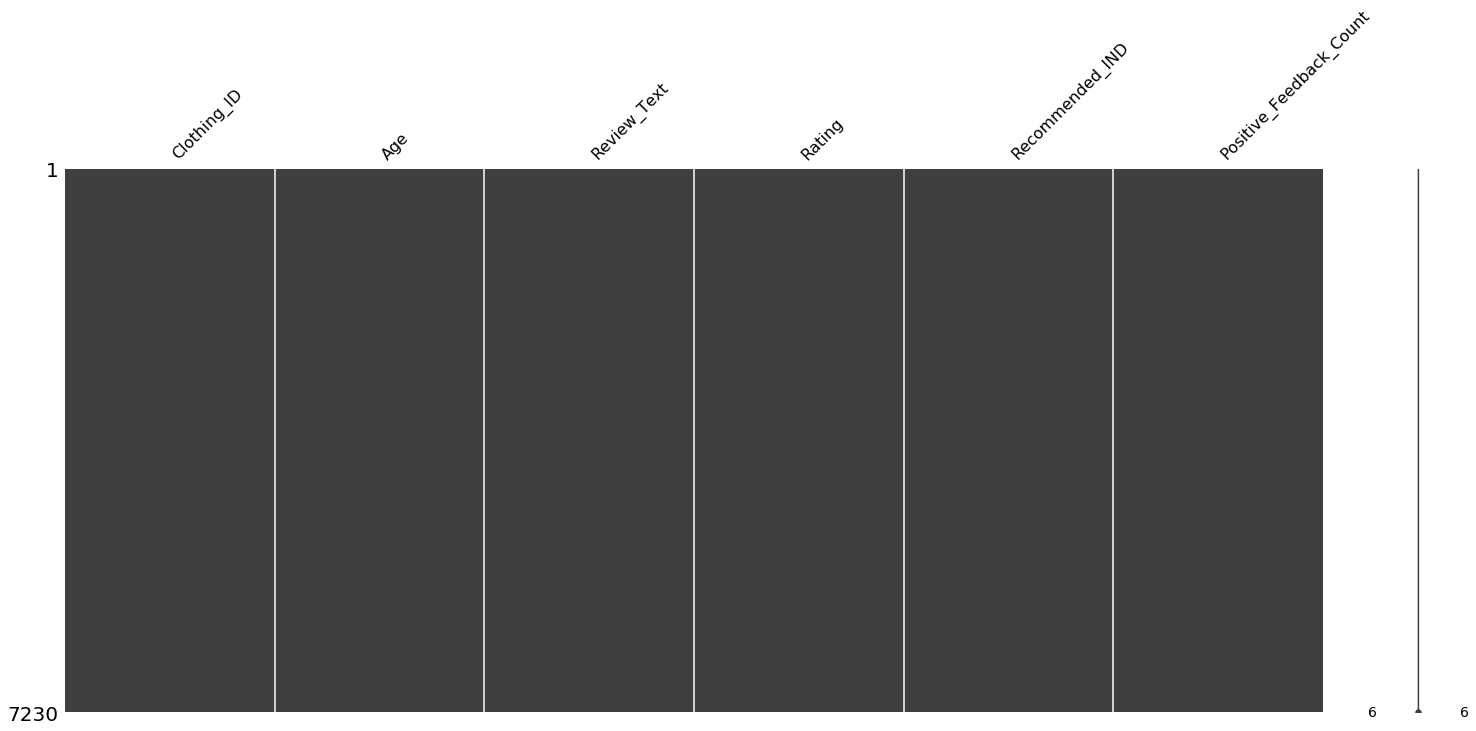

In [66]:
msno.matrix(df)

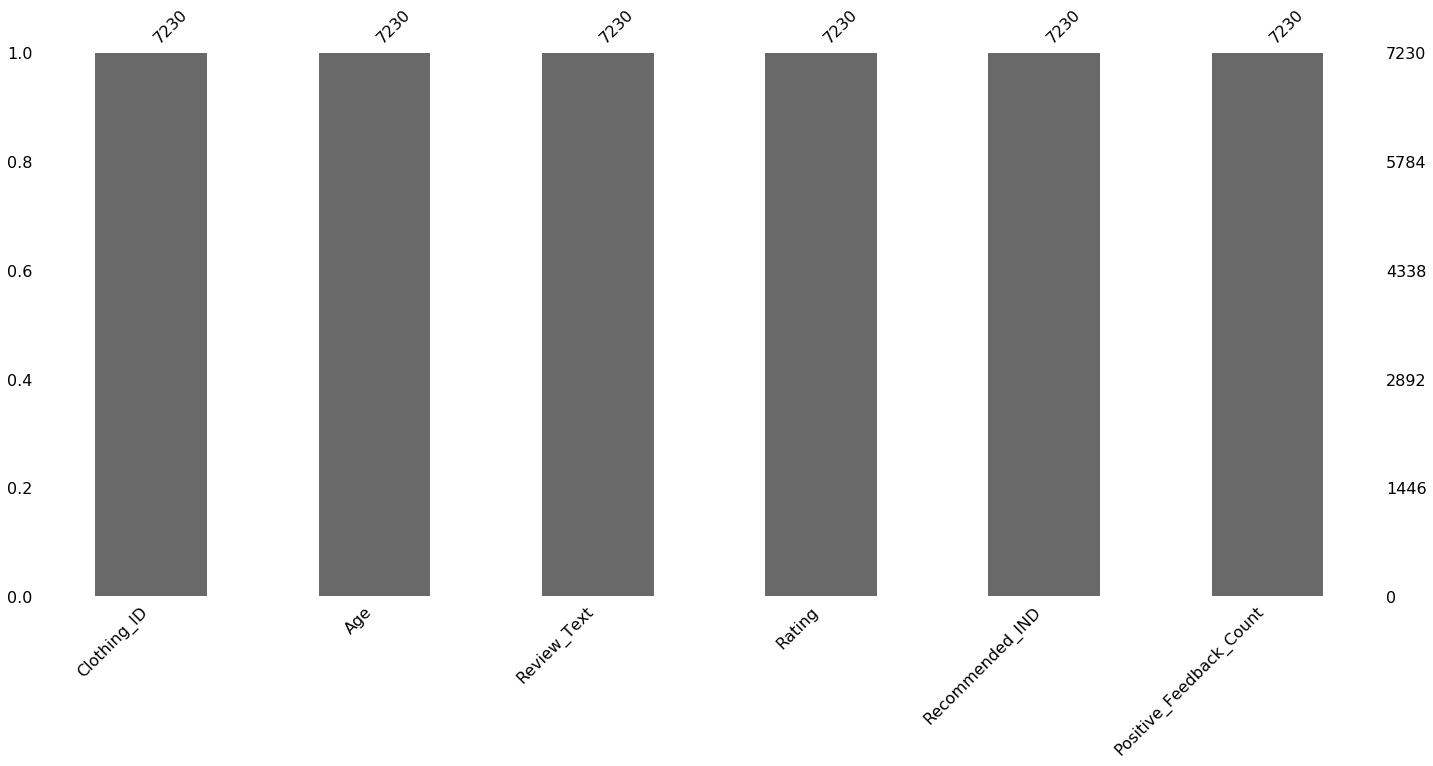

In [67]:
msno.bar(df)

In [68]:
df.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count
count,7230.000000,7230.000000,7230.000000,7230.000000,7230.000000
mean,927.264730,44.259889,4.087828,0.785477,6.729046
std,191.783448,12.340742,1.170677,0.410519,8.120481
min,8.000000,19.000000,1.000000,0.000000,2.000000
25%,860.000000,35.000000,3.000000,1.000000,2.000000
50%,940.000000,42.000000,5.000000,1.000000,4.000000
75%,1078.000000,53.000000,5.000000,1.000000,8.000000
max,1204.000000,93.000000,5.000000,1.000000,122.000000


In [69]:
df.agg(['count', 'size', 'nunique']).T

,count,size,nunique
Clothing_ID,7230,7230,655
Age,7230,7230,72
Review_Text,7230,7230,7228
Rating,7230,7230,5
Recommended_IND,7230,7230,2
Positive_Feedback_Count,7230,7230,77


In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing_ID,7230.0,927.264730,191.783448,8.0,860.0,940.0,1078.0,1204.0
Age,7230.0,44.259889,12.340742,19.0,35.0,42.0,53.0,93.0
Rating,7230.0,4.087828,1.170677,1.0,3.0,5.0,5.0,5.0
Recommended_IND,7230.0,0.785477,0.410519,0.0,1.0,1.0,1.0,1.0
Positive_Feedback_Count,7230.0,6.729046,8.120481,2.0,2.0,4.0,8.0,122.0


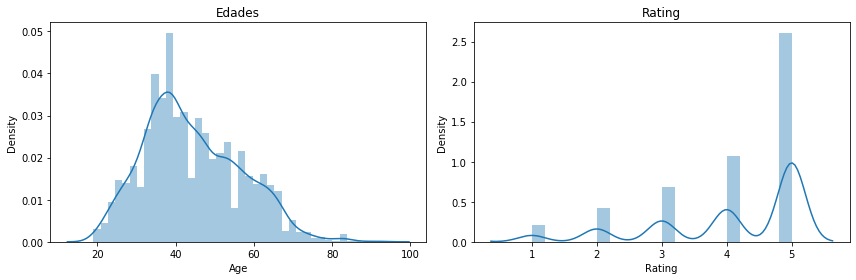

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=False)
sns.distplot(df.Age,ax=ax[0])
ax[0].set_title("Edades")
ax[0].set_ylabel("Density")
sns.distplot(df.Rating)
ax[1].set_title("Rating")
ax[1].set_ylabel("Density")
plt.tight_layout()
plt.show()

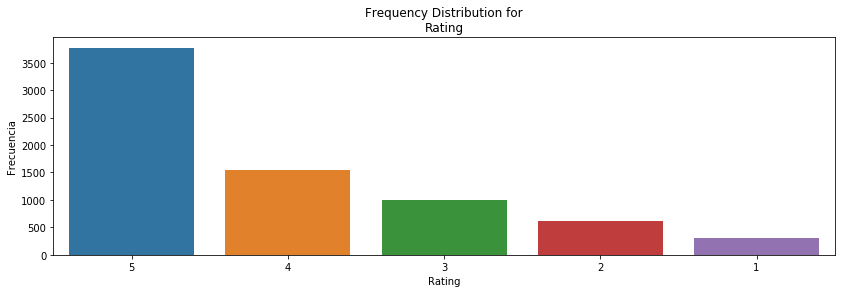

In [72]:
cat_dtypes = ["Rating"]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index)
    axes.set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes.set_ylabel("Frecuencia")
    axes.set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
plt.show()

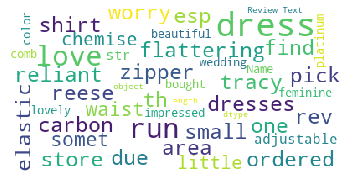

In [73]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = df

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Review_Text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [74]:
df.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count
0,847,47,This shirt is very flattering to all due to th...,5,1,6
1,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4
2,858,39,"I ordered this in carbon for store pick up, an...",4,1,4
3,1077,53,Dress runs small esp where the zipper area run...,3,0,14
4,1095,53,More and more i find myself reliant on the rev...,5,1,2


In [75]:
df=df[pd.notnull(df['Review_Text'])]

In [76]:
df.head()

,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count
0,847,47,This shirt is very flattering to all due to th...,5,1,6
1,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4
2,858,39,"I ordered this in carbon for store pick up, an...",4,1,4
3,1077,53,Dress runs small esp where the zipper area run...,3,0,14
4,1095,53,More and more i find myself reliant on the rev...,5,1,2


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7230 entries, 0 to 7229
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              7230 non-null   int64 
 1   Age                      7230 non-null   int64 
 2   Review_Text              7230 non-null   object
 3   Rating                   7230 non-null   int64 
 4   Recommended_IND          7230 non-null   int64 
 5   Positive_Feedback_Count  7230 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 395.4+ KB


In [78]:
col = ['Review_Text', 'Recommended_IND']
df = df[col]

In [79]:
df.columns

Index(['Review_Text', 'Recommended_IND'], dtype='object')

In [80]:
cat = list(df.Recommended_IND.unique())
ran = list(["SI","NO"])
label = dict(zip(cat,ran))
label

{1: 'SI', 0: 'NO'}

In [81]:
df["Recomendacion"] = df["Recommended_IND"].map(label)
df.head(5)

,Review_Text,Recommended_IND,Recomendacion
0,This shirt is very flattering to all due to th...,1,SI
1,"I love tracy reese dresses, but this one is no...",0,NO
2,"I ordered this in carbon for store pick up, an...",1,SI
3,Dress runs small esp where the zipper area run...,0,NO
4,More and more i find myself reliant on the rev...,1,SI


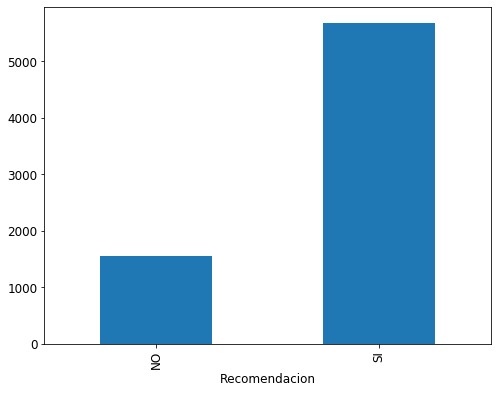

In [82]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Recomendacion').Review_Text.count().plot.bar(ylim=0)
plt.show()

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Review_Text).toarray()
labels = df.Recommended_IND
features.shape

(7230, 8360)

In [84]:
from io import StringIO
category_id_df = df[["Recomendacion",'Recommended_IND']].drop_duplicates().sort_values('Recommended_IND')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[["Recommended_IND","Recomendacion"]].values)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'], df['Recomendacion'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [86]:
####Verificando las predicciones
print(clf.predict(count_vect.transform(["I love it, fits me perfect"])))

['SI']


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    GaussianNB()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

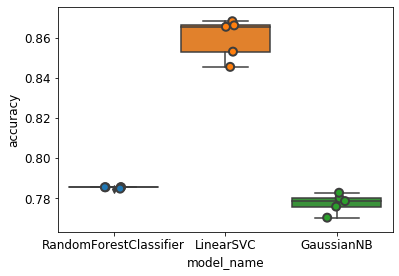

In [88]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [89]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.777593
LinearSVC                 0.860028
RandomForestClassifier    0.785477
Name: accuracy, dtype: float64

In [90]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

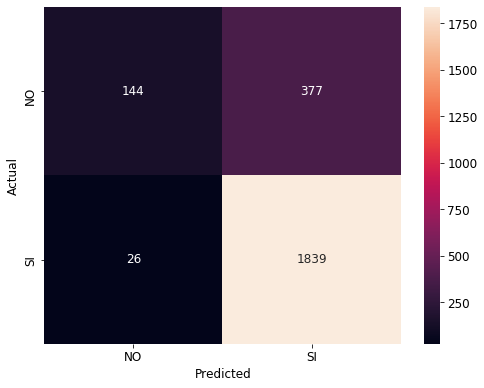

In [91]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Recomendacion.values, yticklabels=category_id_df.Recomendacion.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [92]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print("Precision del modelo")
print(precision)

Precision del modelo
0.8298736462093863


In [93]:
model.fit(features, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
from IPython.display import display

for predicted in category_id_df.Recommended_IND:
  for actual in category_id_df.Recommended_IND:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Recomendacion', 'Review_Text']])
      print('')

'SI' predicted as 'NO' : 26 examples.


,Recomendacion,Review_Text
33,SI,Was so excited to order this beautiful shirt! ...
456,SI,I was so excited to receive this top but was i...
3931,SI,I wanted to love this but if you carry your we...
147,SI,"I really wanted to love this dress, but it was..."
6433,SI,This is a cute waffle t-shirt material is very...
3585,SI,The fit and style of this dress are beautiful....
3684,SI,Fabric was a little more shear than i thought ...
6569,SI,I stalked this blouse and when the price dropp...
2584,SI,I wanted to really love this because it's a bi...
1369,SI,"Was really excited to get this, but got it on ..."



'NO' predicted as 'SI' : 377 examples.


,Recomendacion,Review_Text
771,NO,I ordered a size 0. the dress was extremely la...
4493,NO,I like my clothes loose fitting but even for m...
3092,NO,This looks nothing like it does on the website...
1143,NO,"I purchased this sweater in my usual xs, but f..."
1282,NO,This is a cute dress but the fabric is very he...
...,...,...
1519,NO,"While there is nothing wrong with this top, it..."
3476,NO,"Pretty color, but i was hoping for a thicker, ..."
6559,NO,There isn't much shape to this dress. it's fai...
6706,NO,"I tried this on in my usual xs (5'5"", 128lbs) ..."


In [95]:
from sklearn.model_selection import cross_val_score


In [96]:
X=features
Y=labels

In [97]:
random=RandomForestClassifier()
random.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
r_scores = cross_val_score(random,features, labels,cv=3)
r_scores

array([0.82904564, 0.8373444 , 0.83609959])

In [101]:
np.mean(r_scores)

0.8341632088520056

In [102]:
svc=LinearSVC()
random.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
s_scores = cross_val_score(svc,features, labels,cv=3)
s_scores

array([0.85850622, 0.86763485, 0.86929461])

In [104]:
np.mean(s_scores)

0.8651452282157677

In [105]:
nb=GaussianNB()
random.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
n_scores = cross_val_score(nb,features, labels,cv=3)
n_scores

array([0.78215768, 0.79253112, 0.78921162])

In [107]:
np.mean(n_scores)

0.7879668049792531

In [109]:
np.mean(r_scores),np.mean(s_scores),np.mean(n_scores)

(0.8341632088520056, 0.8651452282157677, 0.7879668049792531)